In [130]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import calendar as cal

In [98]:
#Read the crime data into a DataFrame
crimes = pd.read_csv('crime.csv', encoding='latin-1')
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [88]:
# Read the offense codes into a DataFrame
offense = pd.read_csv('offense_codes.csv', encoding='latin-1')
offense.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [89]:
# Reindex offense codes
offense = offense.set_index('CODE').sort_index()
offense.head()

,NAME
CODE,
111,MURDER NON-NEGLIGIENT MANSLAUGHTER
111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER"
112,KILLING OF FELON BY POLICE
112,KILLING OF FELON BY POLICE
113,KILLING OF FELON BY CITIZEN


In [90]:
# Identify any duplicate codes
mask = offense.index.duplicated(keep=False)
offense[mask].head()

,NAME
CODE,
111,MURDER NON-NEGLIGIENT MANSLAUGHTER
111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER"
112,KILLING OF FELON BY POLICE
112,KILLING OF FELON BY POLICE
114,KILLING OF POLICE BY FELON


In [91]:
# Some codes map to crimes that only differ in a character like a coma,
# but others differ more significantly. For example, code 301 maps to 'ROBBERY - STREET'
# and 'ROBBERY - FIREARM - BANK' 

# We will remove duplicate offense codes keeping the last as unique
duplicates = offense.index.duplicated(keep='last')
offense = offense[~duplicates]
True in offense.index.duplicated() # Should evaluate to False if duplicates were dropped

False

In [99]:
# Add a new column with the name of the offense based on the code
crimes.loc[:,'OFFENSE_NAME'] = crimes['OFFENSE_CODE'].map(offense.to_dict()['NAME'])
crimes[['OFFENSE_CODE','OFFENSE_NAME']].sort_values(by='OFFENSE_CODE').head()

,OFFENSE_CODE,OFFENSE_NAME
62808,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER"
16116,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER"
307409,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER"
105930,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER"
78225,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER"


In [100]:
# Reorder columns
crimes.columns
crimes = crimes[['INCIDENT_NUMBER', 'OFFENSE_NAME', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location']]
crimes.head()

,INCIDENT_NUMBER,OFFENSE_NAME,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,LARCENY ALL OTHERS,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,VANDALISM,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,TOWED MOTOR VEHICLE,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,INVESTIGATE PROPERTY,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,INVESTIGATE PROPERTY,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [101]:
# Set index to incident number
crimes = crimes.set_index('INCIDENT_NUMBER')
crimes.head()

,OFFENSE_NAME,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
INCIDENT_NUMBER,,,,,,,,,,,,,,,,,
I182070945,LARCENY ALL OTHERS,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
I182070943,VANDALISM,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
I182070941,TOWED MOTOR VEHICLE,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
I182070940,INVESTIGATE PROPERTY,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
I182070938,INVESTIGATE PROPERTY,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [104]:
# Get a summary of the numeric data
crimes.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [118]:
# Make OFFENSE_CODE categorical instead of numeric
crimes['OFFENSE_CODE'] = crimes['OFFENSE_CODE'].astype('category')
crimes['OFFENSE_CODE'].cat.set_categories(crimes['OFFENSE_CODE'].unique())

INCIDENT_NUMBER
I182070945        619
I182070943       1402
I182070941       3410
I182070940       3114
I182070938       3114
I182070936       3820
I182070933        724
I182070932       3301
I182070931        301
I182070929       3301
I182070928       3301
I182070927       3114
I182070923       3108
I182070922       2647
I182070921       3201
I182070920       3006
I182070919       3301
I182070918       3305
I182070917       2647
I182070915        614
I182070913       3006
I182070911       3801
I182070910       3006
I182070909       3803
I182070908        522
I182070906       3831
I182070905       3006
I182070904        802
I182070904       2007
I182070903       2900
                 ... 
I110551302-00    3125
I110551302-00     623
I110372326-00     403
I110372326-00    3125
I110261417-00    3125
I110261417-00     619
I110177502-00    3125
I110177502-00     802
I110177502-00    3125
I100636670-00     629
I100636670-00    3125
I100340225-00    3125
I100340225-00     339
I100222105-02   

In [120]:
crimes.describe()

,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,0.996344,3.273691,6.294205,2.159766,3.493618
min,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [127]:
# Find the median month crime was reported by year
#crimes['MONTH'].median()
crimes.groupby('YEAR')['MONTH'].median()

YEAR
2015    9
2016    7
2017    7
2018    5
Name: MONTH, dtype: int64

In [132]:
# Map numeric month to label
crimes.groupby('YEAR')['MONTH'].median().map(lambda x : cal.month_name[x])

YEAR
2015    September
2016         July
2017         July
2018          May
Name: MONTH, dtype: object

In [143]:
# Find most frequent crime
crimes['OFFENSE_NAME'].value_counts().sort_values(ascending=False)

SICK/INJURED/MEDICAL - PERSON                      18783
INVESTIGATE PERSON                                 18754
M/V - LEAVING SCENE - PROPERTY DAMAGE              16323
VANDALISM                                          15154
ASSAULT SIMPLE - BATTERY                           14799
VERBAL DISPUTE                                     13099
TOWED MOTOR VEHICLE                                11287
INVESTIGATE PROPERTY                               11124
LARCENY THEFT FROM BUILDING                         9074
THREATS TO DO BODILY HARM                           9042
LARCENY NON-ACCESSORY FROM VEH. $200 & OVER         8894
PROPERTY - LOST                                     8893
WARRANT ARREST                                      8407
LARCENY SHOPLIFTING                                 7953
M/V ACCIDENT - PROPERTY ÊDAMAGE                     6557
LARCENY ALL OTHERS                                  5970
M/V ACCIDENT - PERSONAL INJURY                      5131
ASSAULT D/W - OTHER            

In [187]:
# Find the offense code for vandalism
code = crimes.query('OFFENSE_NAME == "VANDALISM"')['OFFENSE_CODE'][0]

In [225]:
# Create a subset of all crime data for vandalism
vandalism = crimes[crimes['OFFENSE_CODE'] == code]
len(vandalism.index)

15154

In [226]:
# Prepare data
vandalism = pd.DataFrame(vandalism.groupby(['YEAR', 'MONTH']).size(), columns=['COUNT'])
vandalism.reset_index().head()

,YEAR,MONTH,COUNT
0,2015,6,209
1,2015,7,397
2,2015,8,434
3,2015,9,393
4,2015,10,440


In [227]:
vandalism.COUNT.sum()

15154

In [228]:
# Create a pivot table with a column for each year and a row for each month
vandalism = pd.pivot_table(vandalism, values='COUNT', index='MONTH', columns='YEAR')

In [231]:
# Change index to month name
vandalism.index = vandalism.index.map(lambda x : cal.month_name[x])
vandalism

YEAR,2015,2016,2017,2018
MONTH,,,,
January,NaN,387.0,390.0,351.0
February,NaN,330.0,418.0,280.0
March,NaN,387.0,364.0,314.0
April,NaN,493.0,433.0,274.0
May,NaN,413.0,424.0,389.0
June,209.0,423.0,427.0,396.0
July,397.0,453.0,428.0,343.0
August,434.0,501.0,452.0,389.0
September,393.0,393.0,373.0,32.0


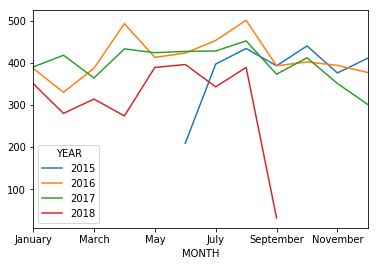

In [233]:
# Plot VANDALISM by MONTH for each YEAR
vandalism.plot()

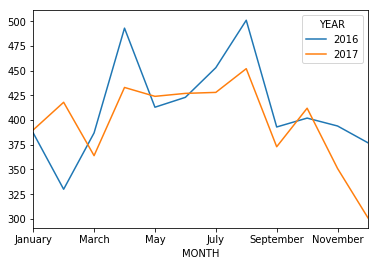

In [236]:
# From the plot we can see that the data for 2015 and 2018 is not complete
# Lets plot only complete years
vandalism[[2016,2017]].plot()